In [1]:
import pandas as pd
df = pd.read_csv('kc_house_data.csv')

### Data Exploration
Quick first look at the data science

In [2]:
df.shape
df.columns
df.describe()
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [3]:
(df['date'].isnull() == True).count()

21597

In [4]:
(df['sqft_basement'].isnull() == True).count()

21597

In [5]:
df['sqft_basement'][1:100]

1      400.0
2        0.0
3      910.0
4        0.0
5     1530.0
       ...  
95     910.0
96       0.0
97       0.0
98     600.0
99       0.0
Name: sqft_basement, Length: 99, dtype: object

In [6]:
print('Month = :' + df['date'][0][:2])
print('Day = :' + df['date'][0][3:5])
print('Year = :' + df['date'][0][6:])

Month = :10
Day = :13
Year = :2014


In [7]:
df['date'][0]

'10/13/2014'

In [9]:
# df['Year'] = df['date'].str.strip().str[-4:]

In [13]:
df[['M','D','Y']] = df['date'].str.split('/',expand=True)

In [25]:
df['???'] = df['sqft_basement'] == '?'
df['???'] = True

In [26]:
# the following columns have NaNs in them...
df.columns[df.isnull().any()].tolist()
# df.isnull().sum()
# df['column'] = df['column'].replace(np.nan, 0)

['waterfront', 'view', 'yr_renovated']

In [27]:
# contains NaN

In [40]:
df.isin(['?']).sum(axis=0)

id                 0
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement    454
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
M                  0
D                  0
Y                  0
???                0
dtype: int64

In [45]:
df['sqft_basement'] = df['sqft_basement'].replace("?",'0')
df.isin(['?']).sum(axis=0)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
M                0
D                0
Y                0
???              0
dtype: int64

In [48]:
df['sqft_basement']=(df['sqft_basement']).astype(float)
#df['date_str']=(df['Year']).astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 25 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
M                21597 non-null object
D                21597 non-null obj

In [34]:
price = df['price']

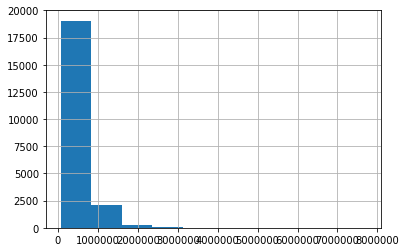

In [35]:
price.hist()

In [36]:
round(price.describe(),0)

count      21597.0
mean      540297.0
std       367368.0
min        78000.0
25%       322000.0
50%       450000.0
75%       645000.0
max      7700000.0
Name: price, dtype: float64

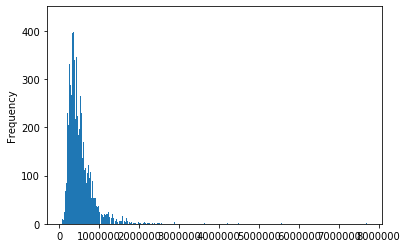

In [37]:
price.plot.hist(alpha = 1, bins = 1000);

In [38]:
import matplotlib as plt
%matplotlib inline

In [39]:
fig = plt.figure(price)

TypeError: 'module' object is not callable

There are 70 unique zipcodes => could be a great indicator for prices

In [ ]:
len(df['zipcode'].unique())